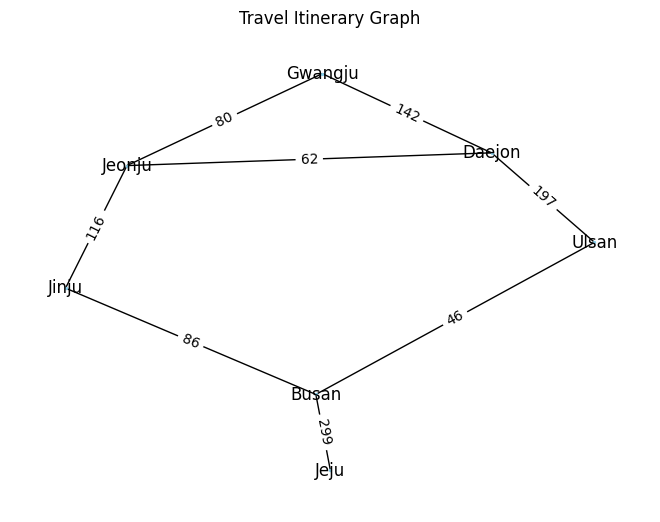

In [10]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt


# Define landmarks here to make it available to all functions in the same cell/scrip
landmarks = {
    "Jeonju" : {
       "Daejon" : 62,
       "Gwangju": 80,
       "Jinju" : 116

    },
    "Jinju" : {"Jeonju" : 116, "Busan": 86},
    "Gwangju" : {"Jeonju": 80, "Daejon": 142},
    "Busan" : {
        "Jinju" : 86,
        "Ulsan" : 46,
        "Jeju": 299
    },
    "Ulsan" : { "Daejon" : 197, "Busan": 46},
    "Jeju" : {"Busan": 299},
    "Daejon" : {
        "Jeonju" : 62,
        "Ulsan" : 197,
        "Gwangju" : 142
    }


}

# ... (rest of your functions: bfs, dijkstra, visualize_graph) ...

# Visualization
visualize_graph(landmarks)



In [ ]:
# BFS (shortest path)
def bfs(graph, start, end) :
  visited = set()
  queue = [(start, [start])]
  while queue:
    current, path = queue.pop(0)
    if current == end :
      return path
    if current not in visited:
      visited.add(current)
      for neighbor in graph[current] :
        queue.append((neighbor, path + [neighbor]) )
  return None

In [ ]:
# Dijkstra's (Shortest travel time)
def dijkstra(graph, start):
  min_heap = [(0, start)]
  times = {landmark: float('inf') for landmark in graph }
  times[start] = 0
  while min_heap:
    current_time, current_landmark = heapq.heappop(min_heap)
    for neighbor, time in graph[current_landmark].items():
      new_time = current_time + time
      if new_time < times[neighbor]:
        times[neighbor] = new_time
        heapq.heappush(min_heap, (new_time, neighbor))
  return times

In [ ]:
# Examples
print("BFS from Jeonju to Jeju:")
print(bfs(landmarks, "Jeonju", "Jeju"))

print("/nDijkstra's from Jeonju:")
print(dijkstra(landmarks, "Jeonju"))

BFS from Jeonju to Jeju:
['Jeonju', 'Jinju', 'Busan', 'Jeju']
/nDijkstra's from Jeonju:
{'Jeonju': 0, 'Jinju': 116, 'Gwangju': 80, 'Busan': 202, 'Ulsan': 248, 'Jeju': 501, 'Daejon': 62}


In [9]:
# Visualize Graph
def visualize_graph(graph):
   G = nx.Graph()
   for landmark, connections in graph.items():
      for neighbor, weight in connections.items():
        G.add_edge(landmark, neighbor, weight=weight)
   pos = nx.spring_layout(G)
   nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2)
   edge_labels = nx.get_edge_attributes(G, 'weight')
   nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
   plt.title("Travel Itinerary Graph")
   plt.show()

# Visualization
visualize_graph(landmarks)


NameError: name 'landmarks' is not defined